In [ ]:
# 加载 Python 库
# 加载数据预处理模块
import pandas as pd
# 加载绘图模块
import seaborn as sns

sns.set_style(style="darkgrid")



# 数据读取

In [9]:
# 数据读取
raw_df = pd.read_csv(r"data-test.csv", encoding="utf8")
# 输出前两行数据，不加参数默认输出前 5 行
raw_df.head(20)


,updateTime,suspectedCount,curedCount,deadCount,currentConfirmedIncr,confirmedIncr
0,1.580000e+12,111,67027,3204,-1351.0,37.0
1,1.580000e+12,111,67026,3204,-1350.0,37.0
2,1.580000e+12,111,67025,3204,-1349.0,37.0
3,1.580000e+12,111,67025,3204,-1353.0,33.0
4,1.580000e+12,111,67024,3204,-1352.0,-33.0
5,1.580000e+12,111,67024,3204,-1352.0,33.0
6,1.580000e+12,111,67024,3204,-1352.0,33.0
7,1.580000e+12,111,67024,3204,-1352.0,33.0
8,1.580000e+12,111,67024,3204,-1352.0,33.0
9,1.580000e+12,111,67024,3204,-1352.0,33.0


# 缺失值处理

## 缺失值查看

In [11]:
# 查看前 5 个样本中，数据是否为缺失值。
raw_df.head(200).isnull()

,updateTime,suspectedCount,curedCount,deadCount,currentConfirmedIncr,confirmedIncr
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [13]:
# 查看每个特征是否存在缺失值
raw_df.isnull().any()

updateTime              False
suspectedCount          False
curedCount              False
deadCount               False
currentConfirmedIncr     True
confirmedIncr            True
dtype: bool

In [4]:
# 查看每个特征缺失值的总数
raw_df.isnull().sum()

updateTime              0
suspectedCount          0
curedCount              0
deadCount               0
currentConfirmedIncr    3
confirmedIncr           3
dtype: int64

## 缺失值填充

In [14]:
#观察疫情数据样本的 currentConfirmedIncr，发现经常出现连续多天数值不变，因此用前一个非缺失值去填充该缺失值。
raw_df["currentConfirmedIncr "] = raw_df["currentConfirmedIncr"].ffill()
raw_df["currentConfirmedIncr "]

0    -1351.0
1    -1350.0
2    -1349.0
3    -1353.0
4    -1352.0
5    -1352.0
6    -1352.0
7    -1352.0
8    -1352.0
9    -1352.0
10   -1352.0
11   -1352.0
12   -1358.0
13   -1358.0
14   -1358.0
15   -1358.0
16   -1358.0
17   -1358.0
18   -1358.0
19   -1358.0
20   -1358.0
21   -1358.0
22   -1447.0
23   -1447.0
24   -1447.0
25   -1447.0
26   -1447.0
27   -1447.0
28   -1450.0
29   -1450.0
30   -1452.0
31   -1452.0
32   -1452.0
33   -1452.0
34   -1447.0
35   -1431.0
36   -1429.0
37   -1432.0
38   -1434.0
Name: currentConfirmedIncr , dtype: float64

In [19]:
# 查看每个特征缺失值是否都完成处理，如果还有特征存在缺失值，需要对该特征进一步处理缺失值
raw_df.isnull().sum()

updateTime               0
suspectedCount           0
curedCount               0
deadCount                0
currentConfirmedIncr     3
confirmedIncr            3
currentConfirmedIncr     0
dtype: int64

## 缺失值删除

In [16]:
#删除新数据集的所有缺失值
non_na_df = raw_df.dropna()
non_na_df

,updateTime,suspectedCount,curedCount,deadCount,currentConfirmedIncr,confirmedIncr,currentConfirmedIncr
0,1.580000e+12,111,67027,3204,-1351.0,37.0,-1351.0
1,1.580000e+12,111,67026,3204,-1350.0,37.0,-1350.0
2,1.580000e+12,111,67025,3204,-1349.0,37.0,-1349.0
3,1.580000e+12,111,67025,3204,-1353.0,33.0,-1353.0
4,1.580000e+12,111,67024,3204,-1352.0,-33.0,-1352.0
5,1.580000e+12,111,67024,3204,-1352.0,33.0,-1352.0
6,1.580000e+12,111,67024,3204,-1352.0,33.0,-1352.0
7,1.580000e+12,111,67024,3204,-1352.0,33.0,-1352.0
8,1.580000e+12,111,67024,3204,-1352.0,33.0,-1352.0
9,1.580000e+12,111,67024,3204,-1352.0,33.0,-1352.0


In [18]:
#当删除掉不需要的行时，行索引会变的不连续，这时候可以重新设计新的索引
non_na_df.reset_index(drop=True,inplace=True)#drop=True：删除原行索引；inplace=True:在数据上进行更新
#检查数据集中是否含有缺失值
non_na_df.isnull().any()

updateTime               False
suspectedCount           False
curedCount               False
deadCount                False
currentConfirmedIncr     False
confirmedIncr            False
currentConfirmedIncr     False
dtype: bool

# 重复值处理

In [26]:
non_na_df_cp = non_na_df.drop_duplicates(["suspectedCount",'curedCount'],keep='last')
non_na_df_cp.reset_index(drop=True,inplace=True)
non_na_df_cp

,updateTime,suspectedCount,curedCount,deadCount,currentConfirmedIncr,confirmedIncr,currentConfirmedIncr
0,1.580000e+12,111,67027,3204,-1351.0,37.0,-1351.0
1,1.580000e+12,111,67026,3204,-1350.0,37.0,-1350.0
2,1.580000e+12,111,67025,3204,-1353.0,33.0,-1353.0
3,1.580000e+12,111,67024,3204,-1358.0,27.0,-1358.0
4,1.580000e+12,95,65675,3194,-1450.0,23.0,-1450.0
5,1.580000e+12,95,65677,3194,-1452.0,23.0,-1452.0
6,1.580000e+12,95,65672,3194,-1447.0,23.0,-1447.0
7,1.580000e+12,95,65656,3194,-1431.0,23.0,-1431.0
8,1.580000e+12,95,65654,3194,-1434.0,18.0,-1434.0


# 异常值处理

## 查看数据基本信息

In [22]:
confirmedIncr_copy = non_na_df.copy()
print(confirmedIncr_copy["confirmedIncr"].to_frame().describe())
confirmedIncr_copy["confirmedIncr"]

       confirmedIncr
count      36.000000
mean       89.138889
std       379.171138
min       -33.000000
25%        23.000000
50%        27.000000
75%        33.000000
max      2300.000000


0       37.0
1       37.0
2       37.0
3       33.0
4      -33.0
5       33.0
6       33.0
7       33.0
8       33.0
9       33.0
10      33.0
11      33.0
12      27.0
13      27.0
14      27.0
15      27.0
16      27.0
17      27.0
18      27.0
19      26.0
20      26.0
21      26.0
22      26.0
23      26.0
24      26.0
25    2300.0
26      23.0
27      23.0
28      23.0
29      23.0
30      23.0
31      23.0
32      23.0
33      23.0
34      20.0
35      18.0
Name: confirmedIncr, dtype: float64

## 数据可视化

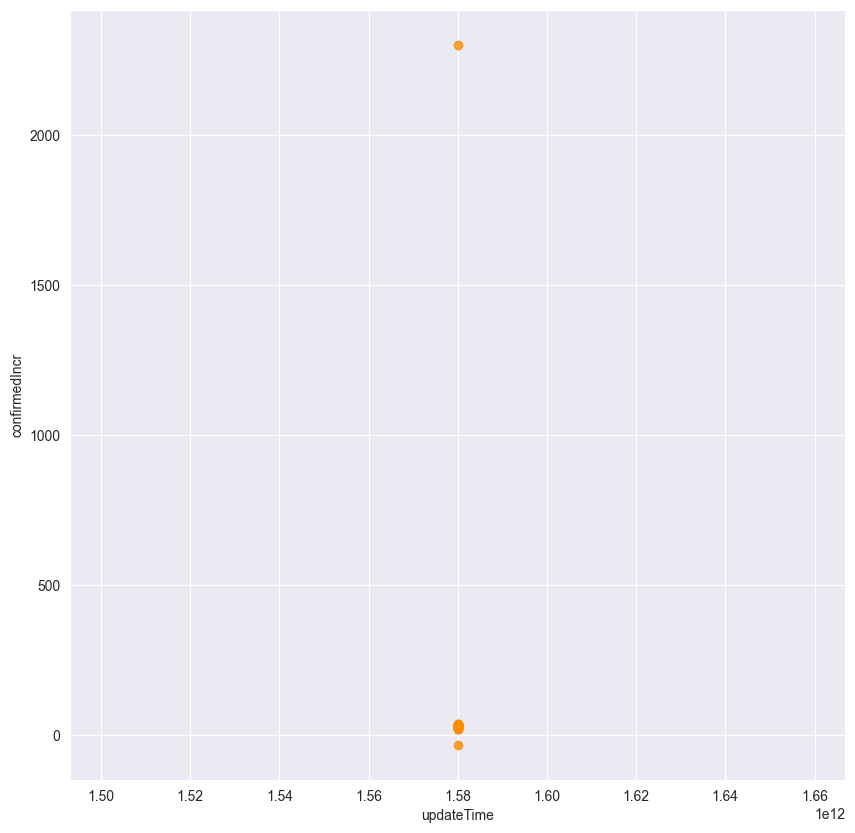

In [23]:
from matplotlib import pyplot as plt

plt.figure(figsize = (10,10))
sns.regplot(x="updateTime", y="confirmedIncr", color='darkorange',data= confirmedIncr_copy)
confirmedIncr_copy.to_csv('data-test-1.1.csv') #保存文件